#**Análise de Dados - Jogadores de Futebol ⚽**

###**Etapa 01:** *Importação dos Dados*

In [39]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Lendo o conjunto de dados
url = 'https://raw.githubusercontent.com/matheuspfferreira/python_data_science/refs/heads/main/Jogadores%20de%20Futebol%20-%2004/dataset/archive/football_mini.csv'
df_jogadores = pd.read_csv(url)

In [41]:
# Visualizando as primeiras linhas do dataframe
df_jogadores.head()

,Unnamed: 0,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,...,75,96,33,28,26,6,11,15,14,8
1,1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,...,85,95,28,31,23,7,11,15,14,11
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000,290000,LW,79,87,...,81,94,27,24,33,9,9,15,15,11
3,3,De Gea,27,Spain,Manchester United,72000000,260000,GK,17,13,...,40,68,15,21,13,90,85,87,88,94
4,4,K. De Bruyne,27,Belgium,Manchester City,102000000,355000,RCM,93,82,...,79,88,68,58,51,15,13,5,10,13


###**Etapa 02:** *Exploração dos Dados*

In [42]:
# Obtendo as informações gerais do dataframe
df_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       100 non-null    int64 
 1   Name             100 non-null    object
 2   Age              100 non-null    int64 
 3   Nationality      100 non-null    object
 4   Club             100 non-null    object
 5   Value            100 non-null    int64 
 6   Wage             100 non-null    int64 
 7   Position         100 non-null    object
 8   Crossing         100 non-null    int64 
 9   Finishing        100 non-null    int64 
 10  HeadingAccuracy  100 non-null    int64 
 11  ShortPassing     100 non-null    int64 
 12  Volleys          100 non-null    int64 
 13  Dribbling        100 non-null    int64 
 14  Curve            100 non-null    int64 
 15  FKAccuracy       100 non-null    int64 
 16  LongPassing      100 non-null    int64 
 17  BallControl      100 non-null    int

In [43]:
# Obtendo as dimensões do dataframe
df_jogadores.shape

(100, 42)

In [44]:
# Verificando a presença de valores nulos (NaN)
df_jogadores.isnull().sum()

,0
Unnamed: 0,0
Name,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Position,0
Crossing,0
Finishing,0


###**Etapa 03:** *Manipulação dos Dados*

In [45]:
# Excluindo a primeira coluna do dataframe
colunas_para_excluir = ['Unnamed: 0']
df_jogadores.drop(colunas_para_excluir, axis=1, inplace=True)
df_jogadores.head()

,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,70,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,89,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000,290000,LW,79,87,62,...,81,94,27,24,33,9,9,15,15,11
3,De Gea,27,Spain,Manchester United,72000000,260000,GK,17,13,21,...,40,68,15,21,13,90,85,87,88,94
4,K. De Bruyne,27,Belgium,Manchester City,102000000,355000,RCM,93,82,55,...,79,88,68,58,51,15,13,5,10,13


In [46]:
# Obtendo todos os goleiros do dataframe e seus atributos
posicao = 'GK'
colunas = ['Name', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
df_goleiros = df_jogadores.query('@posicao in Position')[colunas]
df_goleiros.head()

,Name,GKHandling,GKKicking,GKPositioning,GKReflexes
3,De Gea,85,87,88,94
9,J. Oblak,92,78,88,89
18,M. ter Stegen,85,88,85,90
19,T. Courtois,91,72,86,88
22,M. Neuer,86,91,87,87


###**Etapa 04:** *Análises dos Dados*

In [47]:
# Obtendo a quantidade de jogadores por país
df_nacionalidades = df_jogadores['Nationality'].value_counts().to_frame()

In [48]:
# Alterando o nome da segunda coluna do dataframe de nacionalidades
df_nacionalidades.rename(columns={'count': 'Quantity'}, inplace=True)
df_nacionalidades.head()

,Quantity
Nationality,
Spain,14
Brazil,12
Germany,11
France,9
Belgium,7


In [49]:
# Calculando a média de idade por clube
df_media_idade_clubes = df_jogadores.groupby('Club')['Age'].mean().sort_values(ascending=False).to_frame()
df_media_idade_clubes.head()

,Age
Club,
Vissel Kobe,34.0
Milan,30.0
Roma,29.5
Juventus,29.3
Borussia Dortmund,29.0


In [50]:
# Filtrando o dataframe com base em um ou mais clubes
clubes = ['Juventus']
df_jogadores.query('@clubes in Club')

,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,89,...,85,95,28,31,23,7,11,15,14,11
15,P. Dybala,24,Argentina,Juventus,89000000,205000,LF,82,84,68,...,86,84,23,20,20,5,4,4,5,8
24,G. Chiellini,33,Italy,Juventus,27000000,215000,LCB,58,33,83,...,50,84,93,93,90,3,3,2,4,3
64,Alex Sandro,27,Brazil,Juventus,36500000,160000,LB,84,55,76,...,60,82,81,84,84,7,7,9,12,5
65,Douglas Costa,27,Brazil,Juventus,46500000,175000,LM,84,67,50,...,77,84,45,38,34,13,15,9,12,5
70,L. Bonucci,31,Italy,Juventus,30000000,160000,RCB,44,48,86,...,70,86,90,86,80,2,2,3,2,4
72,M. Pjanić,28,Bosnia Herzegovina,Juventus,44000000,180000,CDM,80,60,60,...,79,86,75,74,70,7,7,13,7,8
73,M. Benatia,31,Morocco,Juventus,30000000,160000,CB,45,47,83,...,41,82,89,87,85,7,4,8,7,11
92,W. Szczęsny,28,Poland,Juventus,32000000,125000,GK,12,12,16,...,18,65,20,13,12,85,81,71,85,87
99,S. Khedira,31,Germany,Juventus,33000000,160000,RCM,72,72,76,...,69,84,80,83,76,11,9,5,15,8


In [51]:
# Obtendo os dez jogadores mais valiosos do dataframe
limite = df_jogadores.Value.mean()
selecao = df_jogadores.Value >= limite
df_jogadores_mais_valiosos = df_jogadores[selecao].sort_values('Value', ascending=False).head(10)
df_jogadores_mais_valiosos

,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000,290000,LW,79,87,62,...,81,94,27,24,33,9,9,15,15,11
0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,70,...,75,96,33,28,26,6,11,15,14,8
4,K. De Bruyne,27,Belgium,Manchester City,102000000,355000,RCM,93,82,55,...,79,88,68,58,51,15,13,5,10,13
5,E. Hazard,27,Belgium,Chelsea,93000000,340000,LF,81,84,61,...,86,91,34,27,22,11,12,6,8,8
15,P. Dybala,24,Argentina,Juventus,89000000,205000,LF,82,84,68,...,86,84,23,20,20,5,4,4,5,8
16,H. Kane,24,England,Tottenham Hotspur,83500000,205000,ST,75,94,85,...,90,89,56,36,38,8,10,11,14,11
25,K. Mbappé,19,France,Paris Saint-Germain,81000000,100000,RM,77,88,77,...,70,86,34,34,32,13,5,7,11,6
7,L. Suárez,31,Uruguay,FC Barcelona,80000000,455000,RS,77,93,77,...,85,85,62,45,38,27,25,31,33,37
17,A. Griezmann,27,France,Atlético Madrid,78000000,145000,CAM,82,90,84,...,79,87,59,47,48,14,8,14,13,14
1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,89,...,85,95,28,31,23,7,11,15,14,11


<BarContainer object of 23 artists>

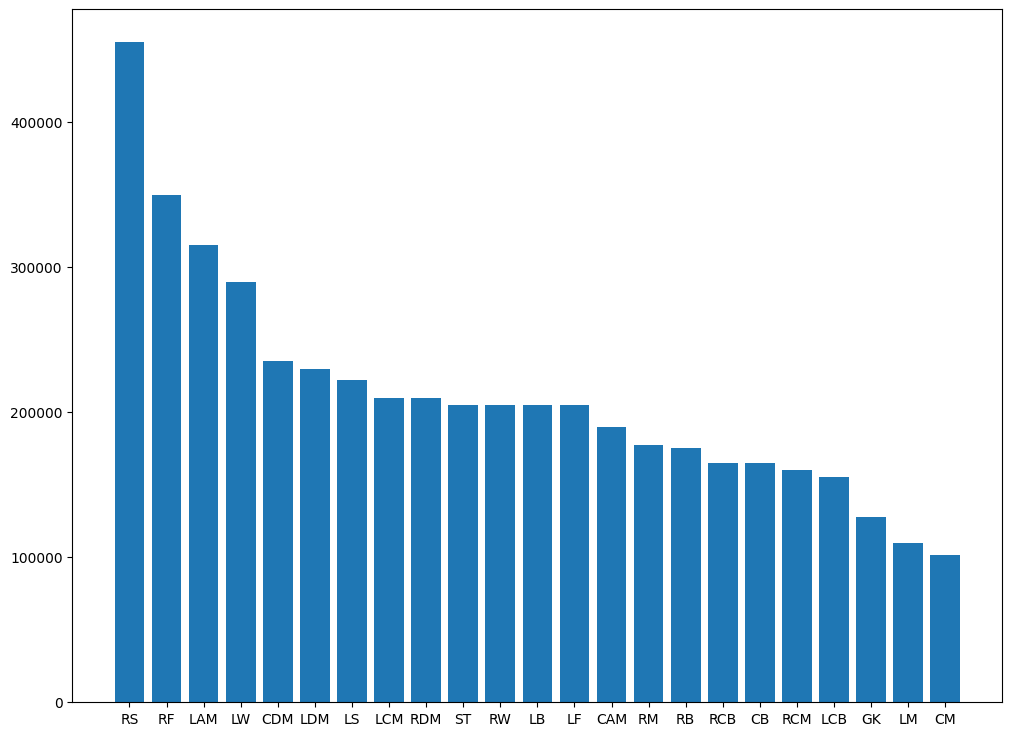

In [52]:
# Calculando a mediana (valor intermediário) de salário por posição
df_posicao_salarios = df_jogadores.groupby('Position')['Wage'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 9))
plt.bar(df_posicao_salarios.index, df_posicao_salarios.values)

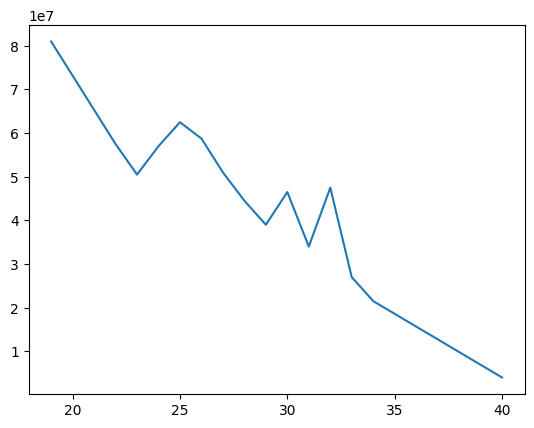

In [53]:
# Verificando o valor de um jogador com base em sua idade
df_valor_idade = df_jogadores.groupby('Age')['Value'].median()
plt.plot(df_valor_idade.index, df_valor_idade.values)

In [54]:
# Definindo os melhores goleiros (média de atributos) do dataframe
atributos = ['GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
df_melhores_goleiros = df_goleiros.groupby('Name')[atributos].mean().mean(axis=1).sort_values(ascending=False)

In [55]:
# Limitando a quantidade de linhas e conversão para dataframe
df_melhores_goleiros = df_melhores_goleiros.to_frame().head()
df_melhores_goleiros

,0
Name,
De Gea,88.50
M. Neuer,87.75
M. ter Stegen,87.00
J. Oblak,86.75
Ederson,85.00


In [56]:
# Alterando o nome da coluna de média dos atributos
df_melhores_goleiros.rename(columns={0: 'Score'}, inplace=True)
df_melhores_goleiros

,Score
Name,
De Gea,88.50
M. Neuer,87.75
M. ter Stegen,87.00
J. Oblak,86.75
Ederson,85.00


In [57]:
# Montando uma reta de regressão entre salários e valores dos jogadores
x = df_jogadores['Wage']
y = df_jogadores['Value']
coeficientes = np.polyfit(x, y, 1)
coef_a, coef_b = coeficientes
reta_regressao = coef_a * x + coef_b

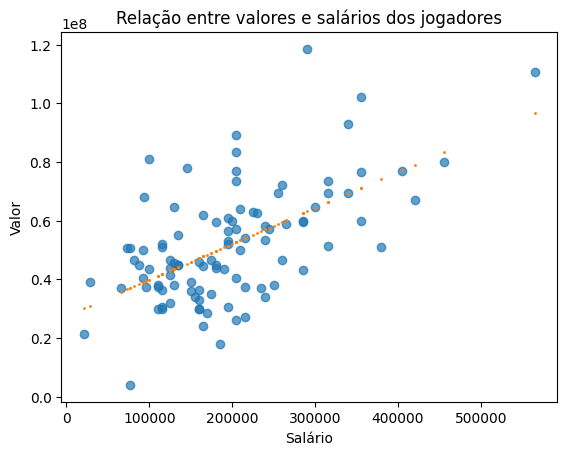

In [58]:
# Criando um gráfico para visualizar a relação
plt.scatter(df_jogadores['Wage'], df_jogadores['Value'], alpha=0.7)
plt.title('Relação entre valores e salários dos jogadores')
plt.xlabel('Salário')
plt.ylabel('Valor')
plt.scatter(x, reta_regressao, 1)
plt.show()

In [59]:
# Definindo os atributos e posições de um atacante (pelas pontas ou central)
atributos = [
    'Finishing', 'ShotPower', 'LongShots', 'Volleys', 'Penalties',
    'Positioning', 'Reactions', 'Composure',
    'Dribbling', 'BallControl', 'ShortPassing', 'Curve',
    'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
    'HeadingAccuracy', 'Jumping']
posicoes_atacante = ['ST', 'CF', 'LW',  'RW', 'LF', 'RF']

In [62]:
# Selecionando os melhores atacantes
df_melhores_atacantes = df_jogadores.groupby('Name')[atributos].mean().mean(axis=1).sort_values(ascending=False).to_frame().head(3)
df_melhores_atacantes

,0
Name,
Cristiano Ronaldo,89.166667
L. Messi,88.722222
A. Griezmann,86.000000


In [63]:
# Alterando o nome da coluna que contêm a média de atributos
df_melhores_atacantes.rename(columns={0: 'Score'}, inplace=True)
df_melhores_atacantes

,Score
Name,
Cristiano Ronaldo,89.166667
L. Messi,88.722222
A. Griezmann,86.000000
